In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df = pd.read_csv("./datasets/heart.csv")


# aim is to predict target( 0 no heart disease and 1 = has heart disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isna().sum()  # no na values found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

D:\Anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


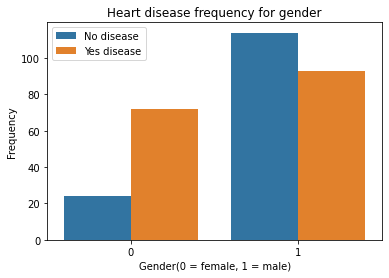

In [9]:
# data viz(forrecords by gender and find one with heart disease and not with heart disease)
sns.countplot("sex", hue = "target", data = df)

plt.title("Heart disease frequency for gender")
plt.legend(["No disease", "Yes disease"])

plt.xlabel("Gender(0 = female, 1 = male)")
plt.ylabel("Frequency")

plt.show()

D:\Anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


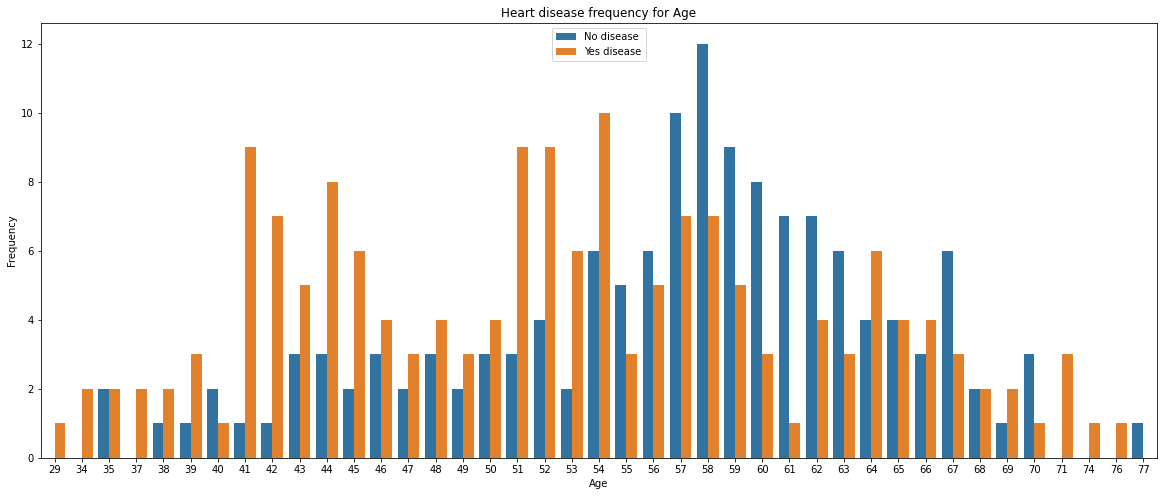

In [11]:
# data viz
plt.figure(figsize = (20, 8))
sns.countplot("age", hue = "target", data = df)

plt.title("Heart disease frequency for Age")
plt.legend(["No disease", "Yes disease"])

plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [13]:
features = df.drop("target", axis = 1)
target = df[["target"]]

In [14]:
target.sample(10)

,target
115,1
267,0
59,1
236,0
88,1
71,1
176,0
167,0
197,0
13,1


In [18]:
# take plain numeric features and standardize 
numeric_features = features[["age", "trestbps", "chol", "thalach", "oldpeak"]].copy()

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [21]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                               columns = numeric_features.columns,
                               index=numeric_features.index)

numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [22]:
categorical_features = features[["sex", "fbs", "exang", "cp", "ca", "slope", "thal", "restecg"]].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [23]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)

processed_features.sample(5)

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
97,-0.260980,-1.349222,-0.256334,-0.115749,-0.810592,1,1,0,0,3,2,3,1
293,1.393352,1.163746,-0.662169,0.015443,-0.206705,1,0,0,2,0,1,3,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
269,0.180175,-0.092738,0.709940,-2.039891,0.483451,1,1,1,0,0,0,3,0
144,2.385951,0.478391,-0.952051,-1.471394,0.052103,0,0,0,2,0,1,2,2


In [24]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target,
                                                   test_size = 0.2, random_state = 1)

In [26]:
# split training data further into validaion and train data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size = 0.15,
                                                 random_state = 10)

In [31]:
def build_model():
    
    # Bianry clf model
    inputs = tf.keras.Input(shape = (x_train.shape[1],))
    
    dense_layer1 = layers.Dense(12, activation = "relu")
    x = dense_layer1(inputs)  # layer takes input layer as input
    
    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation = "relu")
    x = dense_layer2(x)
    
    predictions_layer = layers.Dense(1, activation = "sigmoid")
    predictions = predictions_layer(x)
    
    model = tf.keras.Model(inputs= inputs, outputs = predictions)
    
    model.summary()
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics = ["accuracy",
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5)])
    
    return model
    

In [32]:
model = build_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [33]:
# builds pipeline to transform data and feed to model
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))

dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.int64)>

In [34]:
num_epochs = 100


# pipeline for validation data
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [35]:
model = build_model()

training_history = model.fit(dataset_train, epochs = num_epochs, validation_data = dataset_val)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 4s 337ms/step - loss: 0.6731 - accuracy: 0.5854 - precision_1: 0.8222

In [36]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

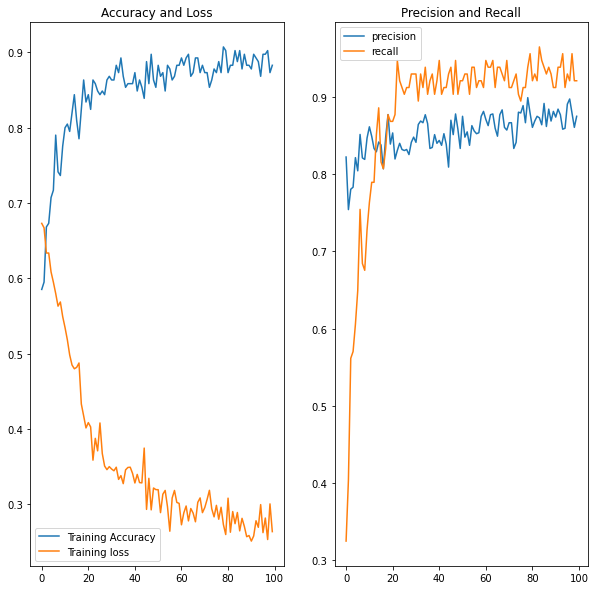

In [37]:
# viz model performance
train_acc = training_history.history["accuracy"]
train_loss = training_history.history["loss"]

precision = training_history.history["precision_1"]
recall = training_history.history["recall_1"]

epochs_range = range(num_epochs)

plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label = "Training Accuracy")
plt.plot(epochs_range, train_loss, label = "Training loss")

plt.title("Accuracy and Loss")
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label = "precision")
plt.plot(epochs_range, recall, label = "recall")

plt.title("Precision and Recall")
plt.legend()

In [38]:
# eval the model
score = model.evaluate(x_test, y_test)

scores_df = pd.Series(score, index = model.metrics_names)

scores_df

2/2 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.7213 - precision_1: 0.6944 - recall_1: 0.8065


loss           0.591103
accuracy       0.721311
precision_1    0.694444
recall_1       0.806452
dtype: float64

In [39]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[2.7364492e-04],
       [9.1340744e-01],
       [1.6505510e-02],
       [5.1213503e-03],
       [2.8118640e-02],
       [2.8432906e-03],
       [2.1748245e-03],
       [5.5910015e-01],
       [1.2486577e-03],
       [9.5007181e-01]], dtype=float32)

In [40]:
# implementing thresholding on score i.e score < 0.5 = 0 and > 0.5 = 1
y_pred = np.where(y_pred <0.5, 0, y_pred)

y_pred = np.where(y_pred >=0.5, 1, y_pred)

In [42]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [44]:
pred_results = pd.DataFrame({"y_test": y_test.values.flatten(),
                           "y_pred": y_pred.flatten().astype("int32")}, index = range(len(y_pred)))

In [45]:
pred_results.sample(10)

,y_test,y_pred
42,1,0
44,0,1
12,0,1
48,0,1
30,1,1
20,1,1
39,1,0
5,0,0
40,1,1
22,1,1


In [46]:
# confusion matrix
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,19,6
1,11,25
